In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Statistical analysis
import scipy.stats as stats

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline


In [3]:
# Load the training data
df = pd.read_csv('House Prices Data/train.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns in dataset: {len(df.columns)}")
df.head()


Dataset shape: (1460, 81)

Columns in dataset: 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Create our feature set
# 1. Square footage: GrLivArea (Above grade living area)
# 2. Bedrooms: BedroomAbvGr 
# 3. Total Bathrooms: Combine all bathroom types

# Fill missing values for bathroom counts with 0
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['FullBath'] = df['FullBath'].fillna(0)
df['HalfBath'] = df['HalfBath'].fillna(0)

# Create total bathrooms feature (counting half baths as 0.5)
df['TotalBathrooms'] = (
    df['FullBath'] + 
    df['BsmtFullBath'] + 
    (df['HalfBath'] + df['BsmtHalfBath']) * 0.5
)

# Create our final feature set
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']
target = 'SalePrice'

# Create a clean dataset with our features
house_data = df[features + [target]].copy()

# Check for missing values
print("Missing values in our features:")
print(house_data.isnull().sum())

# Remove any rows with missing values
house_data = house_data.dropna()

print(f"\nFinal dataset shape: {house_data.shape}")
print(f"\nBasic statistics:")
house_data.describe()


Missing values in our features:
GrLivArea         0
BedroomAbvGr      0
TotalBathrooms    0
SalePrice         0
dtype: int64

Final dataset shape: (1460, 4)

Basic statistics:


,GrLivArea,BedroomAbvGr,TotalBathrooms,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,2.210616,180921.195890
std,525.480383,0.815778,0.785399,79442.502883
min,334.000000,0.000000,1.000000,34900.000000
25%,1129.500000,2.000000,2.000000,129975.000000
50%,1464.000000,3.000000,2.000000,163000.000000
75%,1776.750000,3.000000,2.500000,214000.000000
max,5642.000000,8.000000,6.000000,755000.000000


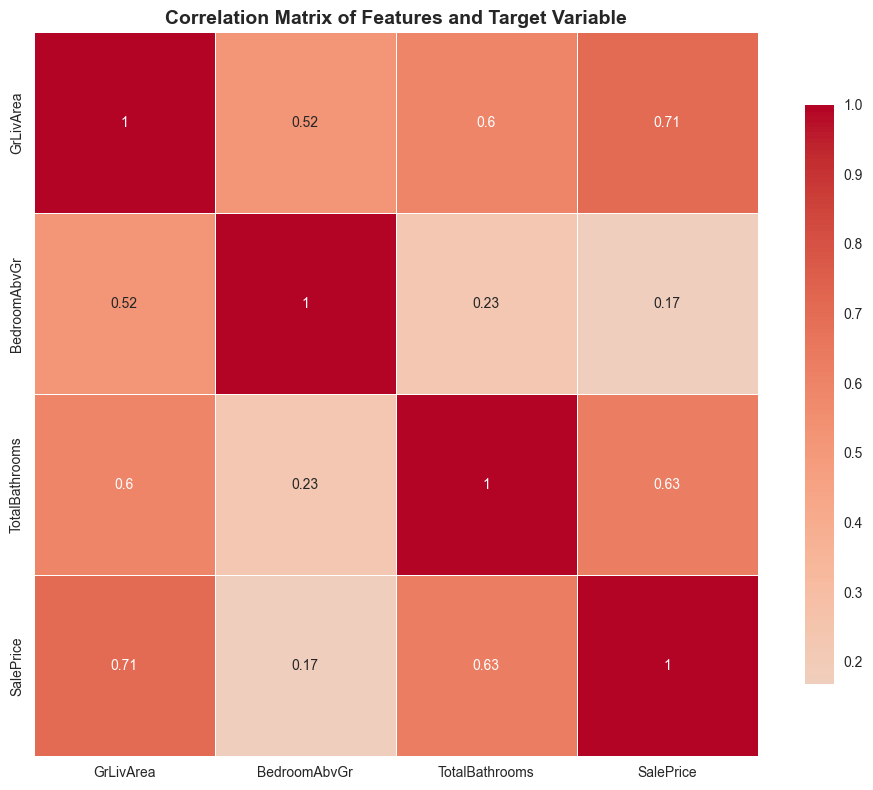


Correlation with Sale Price:
GrLivArea: 0.709
TotalBathrooms: 0.632
BedroomAbvGr: 0.168


In [5]:
# Correlation analysis
correlation_matrix = house_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Features and Target Variable', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Sale Price:")
correlations = house_data.corr()['SalePrice'].sort_values(ascending=False)
for feature, corr in correlations.items():
    if feature != 'SalePrice':
        print(f"{feature}: {corr:.3f}")


In [6]:
# Prepare features and target
X = house_data[features]
y = house_data[target]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print("\nLinear Regression Model Trained Successfully!")
print(f"\nModel Coefficients:")
for feature, coef in zip(features, lr_model.coef_):
    print(f"{feature}: {coef:,.2f}")
    
print(f"\nIntercept: {lr_model.intercept_:,.2f}")


Features shape: (1460, 3)
Target shape: (1460,)

Training set size: 1168
Testing set size: 292

Linear Regression Model Trained Successfully!

Model Coefficients:
GrLivArea: 49,623.77
BedroomAbvGr: -18,700.39
TotalBathrooms: 23,513.71

Intercept: 181,441.54


In [7]:
# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Calculate metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Set Metrics:")
    print(f"Mean Squared Error (MSE): {mse:,.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
    print(f"Mean Absolute Error (MAE): {mae:,.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

train_metrics = calculate_metrics(y_train, y_train_pred, "Training")
test_metrics = calculate_metrics(y_test, y_test_pred, "Testing")



Training Set Metrics:
Mean Squared Error (MSE): 2,395,862,003.65
Root Mean Squared Error (RMSE): 48,947.54
Mean Absolute Error (MAE): 33,344.75
R-squared (R²): 0.5983

Testing Set Metrics:
Mean Squared Error (MSE): 2,623,753,007.35
Root Mean Squared Error (RMSE): 51,222.58
Mean Absolute Error (MAE): 34,395.80
R-squared (R²): 0.6579


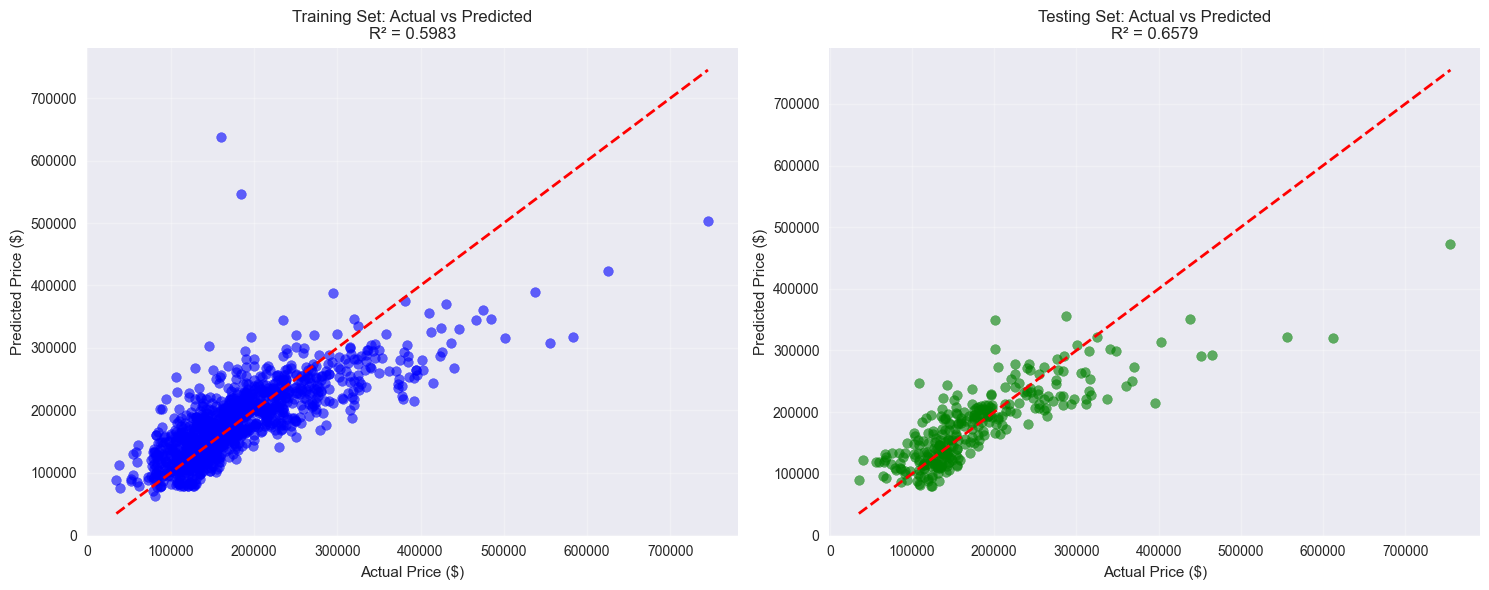

In [8]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_metrics["R2"]:.4f}')
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[1].set_xlabel('Actual Price ($)')
axes[1].set_ylabel('Predicted Price ($)')
axes[1].set_title(f'Testing Set: Actual vs Predicted\nR² = {test_metrics["R2"]:.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [9]:
# Interpret the model coefficients
print("Model Interpretation:")
print("=" * 50)

# Convert coefficients back to original scale for interpretation
original_coefs = lr_model.coef_ / scaler.scale_

print(f"\nLinear Regression Equation (in original scale):")
print(f"SalePrice = {lr_model.intercept_:,.0f} + ")
for i, (feature, coef) in enumerate(zip(features, original_coefs)):
    sign = "+" if coef >= 0 else "-"
    if i == len(features) - 1:
        print(f"           {sign} {abs(coef):.2f} × {feature}")
    else:
        print(f"           {sign} {abs(coef):.2f} × {feature} +")

print("\nInterpretation:")
for feature, coef in zip(features, original_coefs):
    if feature == 'GrLivArea':
        print(f"• For every additional square foot of living area, the house price increases by ${coef:,.2f}")
    elif feature == 'BedroomAbvGr':
        if coef > 0:
            print(f"• For every additional bedroom, the house price increases by ${coef:,.2f}")
        else:
            print(f"• For every additional bedroom, the house price decreases by ${abs(coef):,.2f}")
    elif feature == 'TotalBathrooms':
        print(f"• For every additional bathroom, the house price increases by ${coef:,.2f}")

print(f"\nModel Performance Summary:")
print(f"• The model explains {test_metrics['R2']*100:.1f}% of the variance in house prices")
print(f"• Average prediction error: ${test_metrics['MAE']:,.0f}")
print(f"• Root mean squared error: ${test_metrics['RMSE']:,.0f}")


Model Interpretation:

Linear Regression Equation (in original scale):
SalePrice = 181,442 + 
           + 94.66 × GrLivArea +
           - 23244.43 × BedroomAbvGr +
           + 30177.98 × TotalBathrooms

Interpretation:
• For every additional square foot of living area, the house price increases by $94.66
• For every additional bedroom, the house price decreases by $23,244.43
• For every additional bathroom, the house price increases by $30,177.98

Model Performance Summary:
• The model explains 65.8% of the variance in house prices
• Average prediction error: $34,396
• Root mean squared error: $51,223


In [10]:
# Example predictions for different house configurations
example_houses = pd.DataFrame({
    'GrLivArea': [1500, 2000, 2500, 3000],
    'BedroomAbvGr': [3, 3, 4, 4],
    'TotalBathrooms': [2.0, 2.5, 3.0, 3.5]
})

print("Example House Configurations:")
print(example_houses)

# Scale the features
example_houses_scaled = scaler.transform(example_houses)

# Make predictions
example_predictions = lr_model.predict(example_houses_scaled)

# Display results
results_df = example_houses.copy()
results_df['Predicted_Price'] = example_predictions

print("\nPredicted Prices:")
print("=" * 70)
for i, row in results_df.iterrows():
    print(f"House {i+1}: {row['GrLivArea']:,} sq ft, {row['BedroomAbvGr']} bedrooms, {row['TotalBathrooms']} bathrooms")
    print(f"         Predicted Price: ${row['Predicted_Price']:,.0f}")
    print()


Example House Configurations:
   GrLivArea  BedroomAbvGr  TotalBathrooms
0       1500             3             2.0
1       2000             3             2.5
2       2500             4             3.0
3       3000             4             3.5

Predicted Prices:
House 1: 1,500.0 sq ft, 3.0 bedrooms, 2.0 bathrooms
         Predicted Price: $169,595

House 2: 2,000.0 sq ft, 3.0 bedrooms, 2.5 bathrooms
         Predicted Price: $232,017

House 3: 2,500.0 sq ft, 4.0 bedrooms, 3.0 bathrooms
         Predicted Price: $271,193

House 4: 3,000.0 sq ft, 4.0 bedrooms, 3.5 bathrooms
         Predicted Price: $333,614

